# Approach
<!-- Describe your approach to solving the problem. -->
基本类似435，局部最优：所有重叠在一起的气球用一支箭去射！  

本题本质上就是判断重合！尤其是多个interval如何判断是否重合在一起！  

两种排序方式，主要就是为了让区间尽可能的重叠！！！1. 左边界：按照Xstart从小到大排序，然后从前往后遍历数组；2. 右边界：按照Xend从小到大排序，然后从后往前遍历数组

我们讨论第一种排序: 如果有气球不重合，那必须先射一箭；如果气球重合，那么不射箭。

重点1：如果气球和之前的气球重合，那么该气球的右边界修改为min(本来的值, 上一个气球右边界)！！！这样再下一个气球的左边界如果大于这个新的值，那它就不和之前的气球重合！
重点2：如果一个气球不和之前的气球重合，那么下一个气球肯定也不和它们重合！这是一开始的排序导致的！
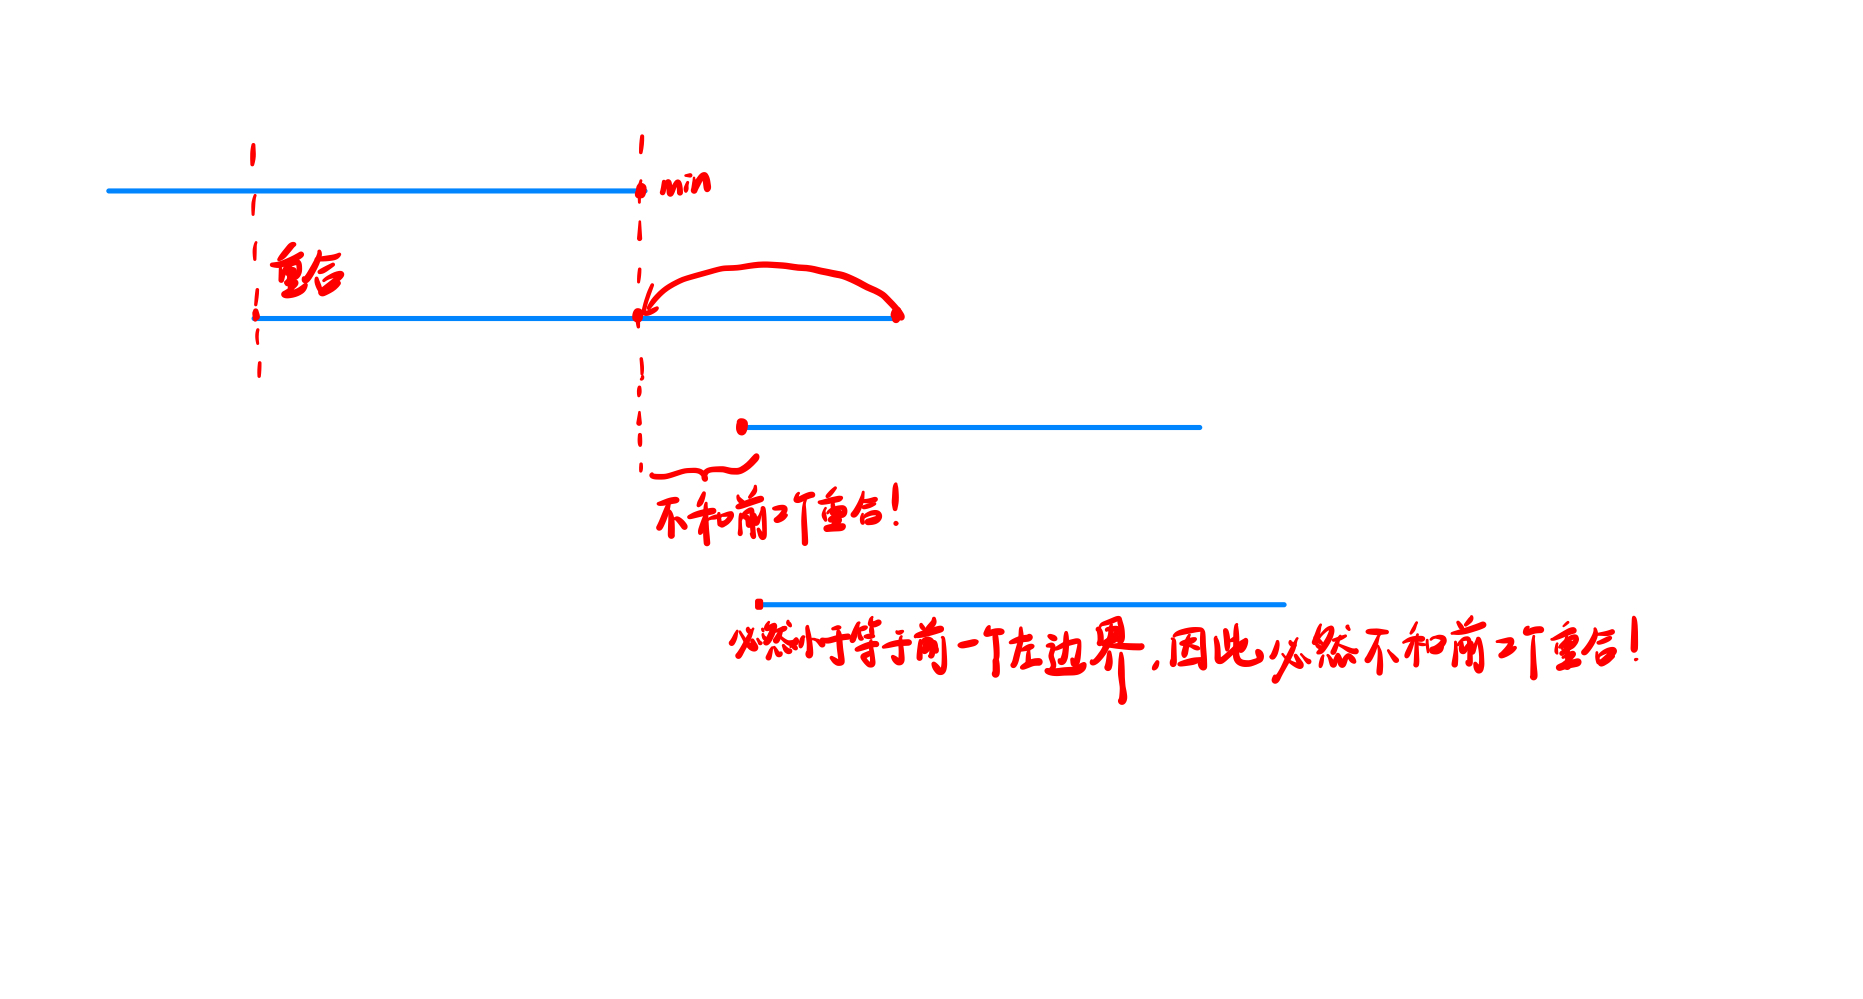


# Note


# Code

In [ ]:
# 左边界排序
class Solution:
    def findMinArrowShots(self, points: List[List[int]]) -> int:
        # 至少有一个气球因此至少射一箭
        num = 1
        points.sort(key = lambda x: x[0])
        # 从前往后遍历
        for i in range(len(points) - 1):
            if points[i + 1][0] > points[i][1]:
                num += 1
            else:
                points[i + 1][1] = min(points[i + 1][1], points[i][1])
        
        return num

In [ ]:
# 右边界排序
class Solution:
    def findMinArrowShots(self, points: List[List[int]]) -> int:
        num = 1
        points.sort(key = lambda x: x[1])
        # 从后往前遍历
        for i in range(len(points) - 1, 0, -1):
            if points[i - 1][1] < points[i][0]:
                num += 1
            else:
                points[i - 1][0] = max(points[i - 1][0], points[i][0])
        
        return num